# ITMAL Exercise

REVISIONS|
---------|------------------------------------------------
2018-1219| CEF, initial.                  
2018-0206| CEF, updated and spell checked. 
2018-0208| CEF, minor text updata. 

## Implementing a dummy classifier with fit-predict interface

We begin with the MNIST data-set and will reuse the data loader you just created. Next we create a dummy classifier, and compare the results of the SGD and dummy classifiers using the MNIST data...

#### Qa  Add a Stochastic Gradient Decent [SGD] Classifier

Create a train-test data-set for MNIST and then add the `SGDClassifier` as done in [HOLM], p82.

Split your data and run the fit-predict for the classifier using the MNIST data.

Notice that you have to reshape the MNIST X-data to be able to use the classifier. It may be a 3D array, consisting of 70000 (28 x 28) images, or just a 2D array consisting of 70000 elements of size 784.

A simple `reshape()` could fix this on-the-fly:
```python
X, y = MNIST_GetDataSet()

print("X.shape=",X.shape) # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print("X.shape=",X.shape) # X.shape= (70000, 784)
```

Remember to use the category-5 y inputs

```python
y_train_5 = (y_train == 5)    
y_test_5  = (y_test == 5)
```
instead of the `y`'s you are getting out of the dataloader...

Test your model on using the test data, and try to plot numbers that have been categorized correctly. Then also find and plots some misclassified numbers.

In [1]:
from libitmal import dataloaders as dl

#from libitmal import dataloaders
mnist = dl.GetMNISTRaw()

Fetched raw MNIST


X.shape= (70000, 784)
X.shape= (70000, 784)


C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


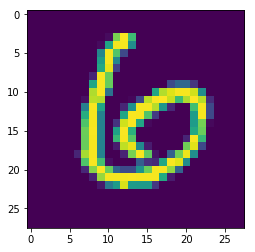

[False]


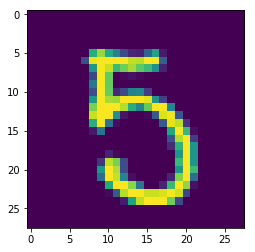

[ True]


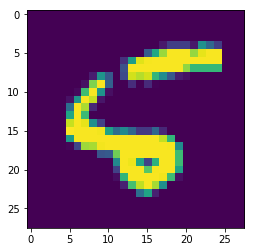

[False]


In [2]:
# TODO: Qa...
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import SGDClassifier
import numpy as np
import sklearn

X, y = dl.MNIST_GetDataSet(mnist)

print("X.shape=",X.shape) # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print("X.shape=",X.shape) # X.shape= (70000, 784)
#Remember to use the category-5 y inputs

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 10000 for test, 60000 for train
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14, random_state=42)

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

y_train_5 = (y_train == 5)
y_test_5  = (y_test == 5)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
first_digit = X_test[11]
dl.MNIST_PlotDigit(first_digit)
print(sgd_clf.predict([first_digit]))

second_digit = X_test[207]
dl.MNIST_PlotDigit(second_digit)
print(sgd_clf.predict([second_digit]))

# The model cannot predict this 5
third_digit = X_test[8]
dl.MNIST_PlotDigit(third_digit)
print(sgd_clf.predict([third_digit]))

#### Qb Implement a dummy binary classifier

Follow the code found in [HOML], p84, but name you estimator `DummyClassifier` instead of `Never5Classifyer`.

Here our Python class knowledge comes into play. The estimator class hierarchy looks like

<img src="Figs/class_base_estimator.png" style="width:500px">

All Scikit-learn classifiers inherit form `BaseEstimator` (and possible also `ClassifierMixin`), and they must have a `fit-predict` function pair (strangely not in the base class!) and you can actually find the `sklearn.base.BaseEstimator` and `sklearn.base.ClassifierMixin` python source code somewhere in you anaconda install dir, if you should have the nerves to go to such interesting details.

But surprisingly you may just want to implement a class that contains the `fit-predict` functions, ___without inheriting___ from the `BaseEstimator`, things still work due to the pythonic 'duck-typing': you just need to have the class implement the needed interfaces, obviously `fit()` and `predict()` but also the more obscure `get_params()` etc....then the class 'looks like' a `BaseEstimator`...and if it looks like an estimator, it _is_ an estimator (aka. duct typing).

Templates in C++ also allow the language to use compile-time duck typing!

> https://en.wikipedia.org/wiki/Duck_typing

Call the fit-predict on a newly instantiated `DummyClassifier` object, and try to compare the confusion matrix for both the dummy and SDG classifier.

We will be discussing the confusion matrix next, but first, print the `y_test_5.shape` and count the numbers of `y_test_5==True` and `y_test_5==False` and see if you can find these numbers in the confusion matrix.

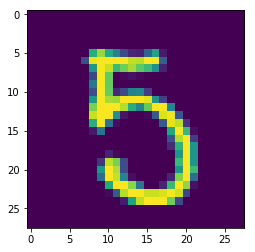

[[False]]

Shape of y_test_5:  (10000,)


C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_it

SGD confusion matrix: 
[[8957  151]
 [ 245  647]]

SGD accuracy: 


C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_it

[0.95170966 0.95979598 0.96969697]

Dummy confusion matrix: 
[[9108    0]
 [ 892    0]]

Dummy accuracy: 
[0.90791842 0.91029103 0.91419142]


In [3]:
# TODO: Qb
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

digit = X_test[11]
dummyClassifier = DummyClassifier()
dummyClassifier.fit(X_train, y_train_5)

dl.MNIST_PlotDigit(second_digit)
print(dummyClassifier.predict([second_digit]))
print()
print('Shape of y_test_5: ', y_test_5.shape)

y_test_pred_SGD = cross_val_predict(sgd_clf, X_test, y_test_5, cv=3)
y_test_pred_DumDum = cross_val_predict(dummyClassifier, X_test, y_test_5, cv=3)


# Confusion matrix shows:
# True Positive     False Positive
# False Negative    True Negative
print("SGD confusion matrix: ")
print(confusion_matrix(y_test_5, y_test_pred_SGD))
print()
print("SGD accuracy: ")
print(cross_val_score(sgd_clf, X_test, y_test_5, cv=3, scoring="accuracy"))
print()
print("Dummy confusion matrix: ")
print(confusion_matrix(y_test_5, y_test_pred_DumDum))
print()
print("Dummy accuracy: ")
print(cross_val_score(dummyClassifier, X_test, y_test_5, cv=3, scoring="accuracy"))

# By looking at the confusion matrix, it is seen that the Dummy classifier has more true positives than the SGD. This is very
# obvious since it will classify all instances as a not-5. Dummy classifier will have no false positives or true negatives
# because of this. The SGD classifier classifies 8957 as true positives and 647 as true negatives, and 151 as false positives
# and 245 as false negatives. This is obviously a lot better than the Dummy classifier that identifies 892 as false negatives
# This shows that the mere precision of a classifier is not sufficient, but it has to be more sensitive to data as well.
# The total number of the two confusion matrices is 10000, because the cross_val_predict is calculated on the test data with
# 10000 instances.
# The scores of test folds are returned when calling cross_val_score. This shows that the mean accuracy of the SGD is better 
# than the Dummy classifier, since the false negatives of the Dummy classifier is very high.